# FINAL PROJECT

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
match_details = pd.read_csv('Match.csv')
match_details = match_details.dropna(subset=['Toss_Winner', 'match_winner'])

overs_details = pd.read_csv('Ball_By_Ball.csv')
over_details_death = overs_details[overs_details['Over_id'] > 16]

player = pd.read_csv('Player.csv', encoding='unicode_escape')

team_details = pd.read_csv('Team.csv', encoding='unicode_escape')

players_age = pd.read_csv('Player_match.csv', encoding='unicode_escape')

winners = pd.read_csv('Winners.csv')

## Hypothesis 1: Event of winning the toss is positively correlated with the event of a team winning the game

In [3]:
def match_results(df):
    """
    This function return number of wins and loses of the team that won the toss at the beginning of match.
    :param df: the dataframe that contains 'toss_winner' and 'match_winner' columns
    :return: a tuple containing number of wins and losses of team winning the toss

    >>> print(match_results(match_details))
    (324, 309)
    """
    won = 0
    for index, row in df.iterrows():
        if row['Toss_Winner'] == row['match_winner']:
            won += 1

    loss = len(match_details) - won
    return won, loss

In [4]:
match_results(match_details)

(324, 309)

In [5]:
def bar_plot1(value1, value2, x_axis, y_axis, title):
    """
    This function creates a bar plot after creating a dataframe with the values stored.
    :param value1: the label of the first bar
    :param value2: the label of the second bar
    :param x_axis: the x-axis label
    :param y_axis: the y-axis label
    :param title: the title of the plot
    :return: a plot with the entered parameters
    """
    df_temp = pd.DataFrame({x_axis: [value1, value2], y_axis: match_results(match_details)})
    plt.bar(df_temp[x_axis], height=df_temp[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

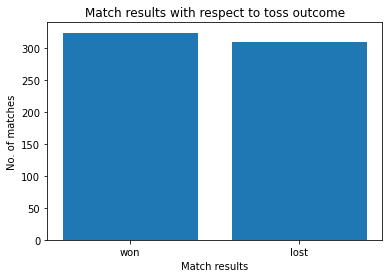

In [6]:
bar_plot1('won', 'lost', 'Match results', 'No. of matches', 'Match results with respect to toss outcome')

### Conclusion:
From the given plot we can see that the bar "Won" which depicts the number of times team has won the match after winning the toss is similar to the bar "Lost" which depicts the number of times team has won the match after lossing the toss. Hence, we see that there is no such trend and hence we reject the hypothesis.

## Hypothesis 2: Fast bowlers are more effective than spinners during death overs. (Death over – Last 4 overs of the innings)

In [7]:
fast_bowlers = player[(player['Bowling_skill']=='Right-arm medium')|(player['Bowling_skill']=='Right-arm fast-medium')|(player['Bowling_skill']=='Right-arm medium-fast')|(player['Bowling_skill']=='Left-arm fast-medium')|(player['Bowling_skill']=='Left-arm medium-fast')|(player['Bowling_skill']=='Right-arm fast')|(player['Bowling_skill']=='Left-arm fast')|(player['Bowling_skill']=='Left-arm medium')|(player['Bowling_skill']=='Right-arm medium fast')|(player['Bowling_skill']=='\xa0Right-arm fast-medium')|(player['Bowling_skill']=='\xa0Right-arm medium-fast')|(player['Bowling_skill']=='\xa0Left-arm fast')]

In [8]:
slow_bowlers = player[(player['Bowling_skill']=='Right-arm offbreak')|(player['Bowling_skill']=='Legbreak googly')|(player['Bowling_skill']=='Slow left-arm orthodox')|(player['Bowling_skill']=='Slow left-arm chinaman')|(player['Bowling_skill']=='Legbreak')|(player['Bowling_skill']=='Right-arm bowler')|(player['Bowling_skill']=='\xa0Legbreak')|(player['Bowling_skill']=='\xa0Right-arm offbreak')]

In [9]:
def economy_rate(bowlers):
    """
    This function will return the economy rate of bowlers data passed through function.
    :param bowlers: it is a subset of the 'players' dataframe containing specific bowling players
    :return: a float value which represents economy rate of set of players passed initially

    >>> print(economy_rate(fast_bowlers))
    9.292946530147896
    """
    merged_data = pd.merge(over_details_death, bowlers, how='inner', left_on=['BOWLER_SK'], right_on=['PLAYER_SK'])
    pivot_data = pd.pivot_table(merged_data, index=['MatcH_id', 'Innings_No'], columns='Over_id', values='Runs_Scored',
                                aggfunc='sum', fill_value=0)
    total_overs = 0
    total_runs = 0
    for i in range(0, len(pivot_data)):
        for j in pivot_data.values[i]:
            total_runs = total_runs + j
            if j != 0:
                total_overs += 1
    economy = total_runs / total_overs
    return economy

In [10]:
def bar_plot2(value1, value2, x_axis, y_axis, title):
    """
    This function creates a bar plot after creating a dataframe with the values stored.
    :param value1: the label of the first bar
    :param value2: the label of the second bar
    :param x_axis: the x-axis label
    :param y_axis: the y-axis label
    :param title: the title of the plot
    :return: a plot with the entered parameters
    """
    df_temp = pd.DataFrame({x_axis: [value1, value2], y_axis: [economy_rate(fast_bowlers), economy_rate(slow_bowlers)]})
    plt.bar(df_temp[x_axis], height=df_temp[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

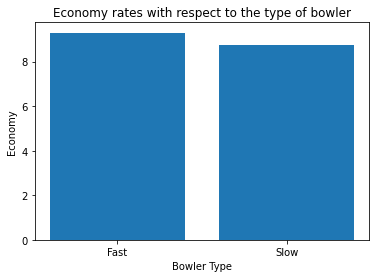

The economy rate of fast bowlers is 9.292946530147896 and that for spinners is 8.75784190715182


In [11]:
bar_plot2('Fast', 'Slow', 'Bowler Type', 'Economy', 'Economy rates with respect to the type of bowler')
print("The economy rate of fast bowlers is {} and that for spinners is {}".format(economy_rate(fast_bowlers), economy_rate(slow_bowlers)))

### Conclusion:
Here we can see that fast bowlers have a higher economy rate as compared to spinners, hence we reject the hypothesis as spinners which have a lower economy rate are more effective. Hence, from the above graph we can see that spinners are more effective as compared to fast bowlers during death overs.

## Hypothesis 3: Players aged 35 or more have a lesser impact on the game as compared to younger players.

In [12]:
def under_35_data(key):
    """
    This function returns dataframe with only those players that have age more than or equal to 35.
    :param key: the column from 'overs_details' table that we should use while merging data, it should be in qoutes
    :return: a dataframe containing players with age more than or equal to 35

    >>> value = under_35_data('Striker_match_SK')
    >>> print(value.head()) #doctest: +NORMALIZE_WHITESPACE
           MatcH_id  Over_id  Ball_id  ...  Opposit_captain Player_keeper   Opposit_keeper
    4    598028       14        1  ...          V Kohli     DH Yagnik  KB Arun Karthik
    5    598028       14        3  ...          V Kohli     DH Yagnik  KB Arun Karthik
    6    598028       13        1  ...          V Kohli     DH Yagnik  KB Arun Karthik
    7    598028       13        4  ...          V Kohli     DH Yagnik  KB Arun Karthik
    8    598028       13        5  ...          V Kohli     DH Yagnik  KB Arun Karthik
    <BLANKLINE>
    [5 rows x 70 columns]
    """
    merged_data = pd.merge(overs_details, players_age, how='inner', left_on=[key],
                           right_on=['Player_match_SK'])
    final_data = merged_data[merged_data['Age_As_on_match'] >= 35]
    return final_data

In [13]:
age_bat_data = under_35_data('Striker_match_SK')
runs_bat = age_bat_data.groupby(['Striker_match_SK'])['Runs_Scored'].sum()

In [14]:
def limit_partition(limit, total):
    """
    This function is returns number of players above and below a certain decided limit.
    :param limit: the limit which decides the partition between players
    :param total: aggregated data which is grouped by key used in the previous function
    :return: tuple with number of players that are above and below the limit

    >>> print(limit_partition(35, runs))
    (285, 904)
    """
    above_limit = 0
    below_limit = 0
    for i in total:
        if i >= limit:
            above_limit += 1
        else:
            below_limit += 1
    return above_limit, below_limit

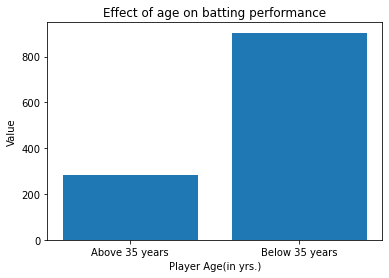

In [15]:
hypo_3_1 = pd.DataFrame({'Player Age': ['Above 35 years', 'Below 35 years'], 'Value': limit_partition(35, runs_bat)})
plt.bar(hypo_3_1['Player Age'], height=hypo_3_1['Value'])
plt.xlabel('Player Age(in yrs.)')
plt.ylabel('Value')
plt.title('Effect of age on batting performance')
plt.show()

In [16]:
age_bowl_data = under_35_data('Bowler_match_SK')
wickets_bowl = age_bowl_data.groupby(['Bowler_match_SK'])['Bowler_Wicket'].sum()

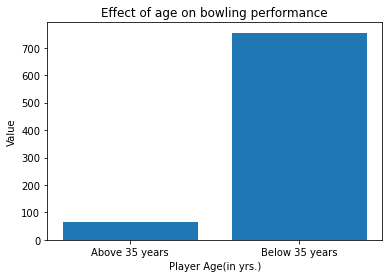

In [17]:
hypo_3_1 = pd.DataFrame({'Player Age': ['Above 35 years', 'Below 35 years'], 'Value': limit_partition(3, wickets_bowl)})
plt.bar(hypo_3_1['Player Age'], height=hypo_3_1['Value'])
plt.xlabel('Player Age(in yrs.)')
plt.ylabel('Value')
plt.title('Effect of age on bowling performance')
plt.show()

## Hypothesis 4: Teams with orange or purple cap holder has a higher chance of winning the tournament. (Orange cap – player with highest runs in the tournament, purple cap – player with highest wickets in the tournament)

In [18]:
def find_orange_winners(year):
    """
    This function is used to find which team does the orange cap holder belongs to.
    :param year: year for which the orange cap winner is to be found
    :return: name of the team that the orange cap winner belongs to

    >>> print(find_orange_winners(2010))
    Mumbai Indians

    >>> print(find_orange_winners(2011))
    Royal Challengers Bangalore
    """
    season = overs_details[overs_details['Season'] == year]
    striker = season.groupby(['StrikerSK'])['Runs_Scored'].sum()
    orange_id = striker.idxmax()
    most_run = player[player['PLAYER_SK'] == orange_id]['Player_Id']
    most_run_index = most_run.values
    team_name = players_age[(players_age['Player_Id'] == most_run_index[0]) & (players_age['Season_year'] == year)][
        'Player_team'].unique()[0]
    return team_name

In [19]:
def find_purple_winners(year):
    """
    This function is used to find which team does the purple cap holder belongs to.
    :param year: year for which the purple cap winner is to be found
    :return: name of the team that the purple cap winner belongs to

    >>> print(find_purple_winners(2010))
    Deccan Chargers

    >>> print(find_purple_winners(2011))
    Mumbai Indians
    """
    season = overs_details[overs_details['Season'] == year]
    bowler = season.groupby(['BOWLER_SK'])['Bowler_Wicket'].sum()
    purple_id = bowler.idxmax()
    most_wickets = player[player['PLAYER_SK'] == purple_id]['Player_Id']
    most_wickets_index = most_wickets.values
    team_name = players_age[(players_age['Player_Id'] == most_wickets_index[0]) & (players_age['Season_year'] == year)][
        'Player_team'].unique()[0]
    return team_name

In [20]:
def hypothesis_4(from_year, to_year):
    """
    This function implements tasks to analyse our hypothesis no.5
    :param from_year: inclusive year from which you want to analyze hypothesis 5
    :param to_year: excluding year to which you want to analyze hypothesis 5
    :return: a tuple containing percentage of times orange cap holder was part of the winning team and percentage of
    times purple cap holder was part of the winning team

    >>> print(hypothesis_4(2008, 2018))
    (10.0, 30.0)
    """
    orange = 0
    purple = 0
    year = 0
    for i in range(from_year, to_year):
        most_runs = find_orange_winners(i)
        most_wickets = find_purple_winners(i)
        winners_values = winners[winners['season_year'] == i]['Team']
        if most_runs == winners_values.values[0]:
            orange += 1
        elif most_wickets == winners_values.values[0]:
            purple += 1
        year += 1
    orange_ratio = (orange / year * 100)
    purple_ratio = (purple / year * 100)
    return orange_ratio, purple_ratio

In [21]:
total_wins = hypothesis_4(2008, 2018)

In [22]:
def pie_chart(value):
    """
    This function is used to create a pie chart based on the ration provided
    :param value: the percentage value using which we want to divide the pie chart into two parts
    :return: a pie chart with the mentioned division into two parts
    """
    fig1, ax1 = plt.subplots()
    labels = ['Wins', 'Losses']
    sizes = [value, 100 - value]
    explode = (0.1, 0)
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Win percentage')
    plt.show()

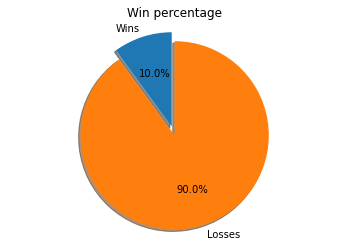

In [23]:
pie_chart(total_wins[0])

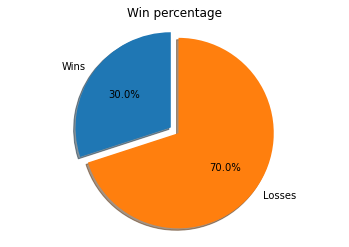

In [24]:
pie_chart(total_wins[1])